# Data Visualisation and Exploratory Data Analysis

Before we continue with analysis, first we present the cleaned data visually to obtain some preliminary insights and explore the larger observable patterns in the data.


In [12]:
import seaborn as sns
from matplotlib import pyplot as plt


In [13]:
%%capture

# Running the previous files
%run data-extraction.ipynb

In [59]:
# Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


## Pairplot

We set up a pairplot for each of the variables relevant to the family composition and general spending amounts.


Relative Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

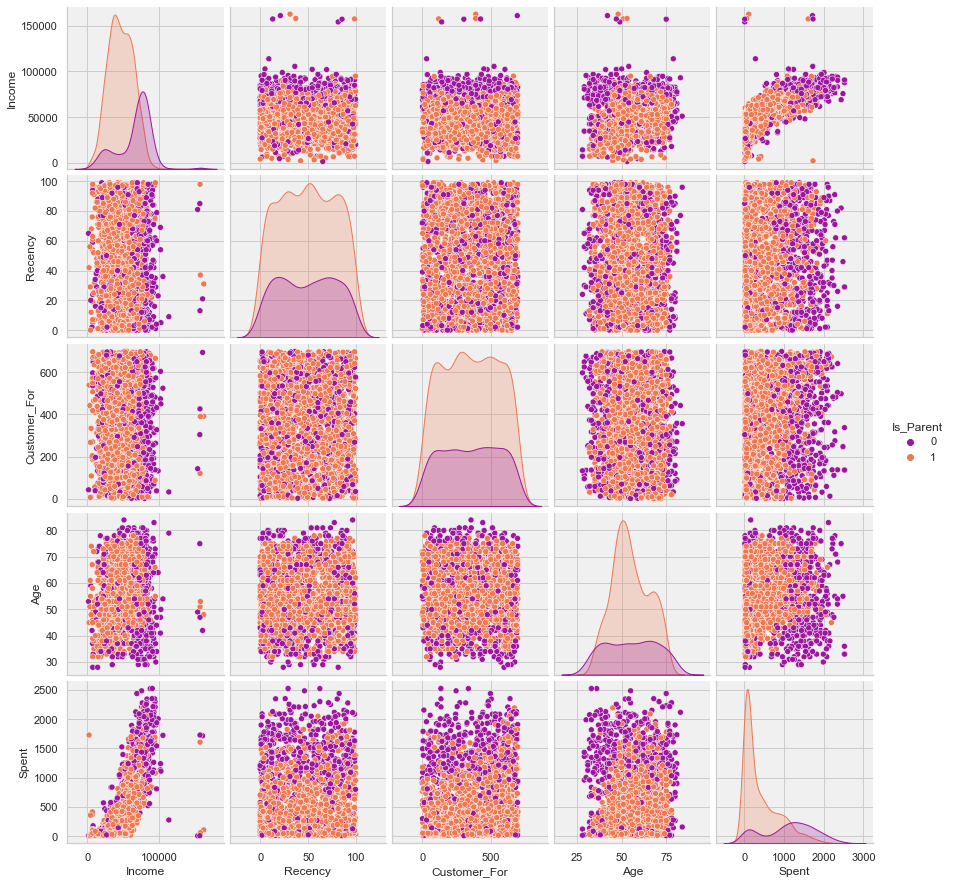

In [60]:
sns.set_style("whitegrid", {"axes.facecolor": "#F0F0F0"})

# To plot some selected features
colors = sns.color_palette("plasma", n_colors=2)
# Plotting following features
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=colors)
plt.show()

We preliminarily observe that customers who are parents may spend more than those without, but further investigation and visualisation is required.


## Correlation Exploration

Next, we want to explore the bivariate correlations between the features. To do this we use a correlation matrix:


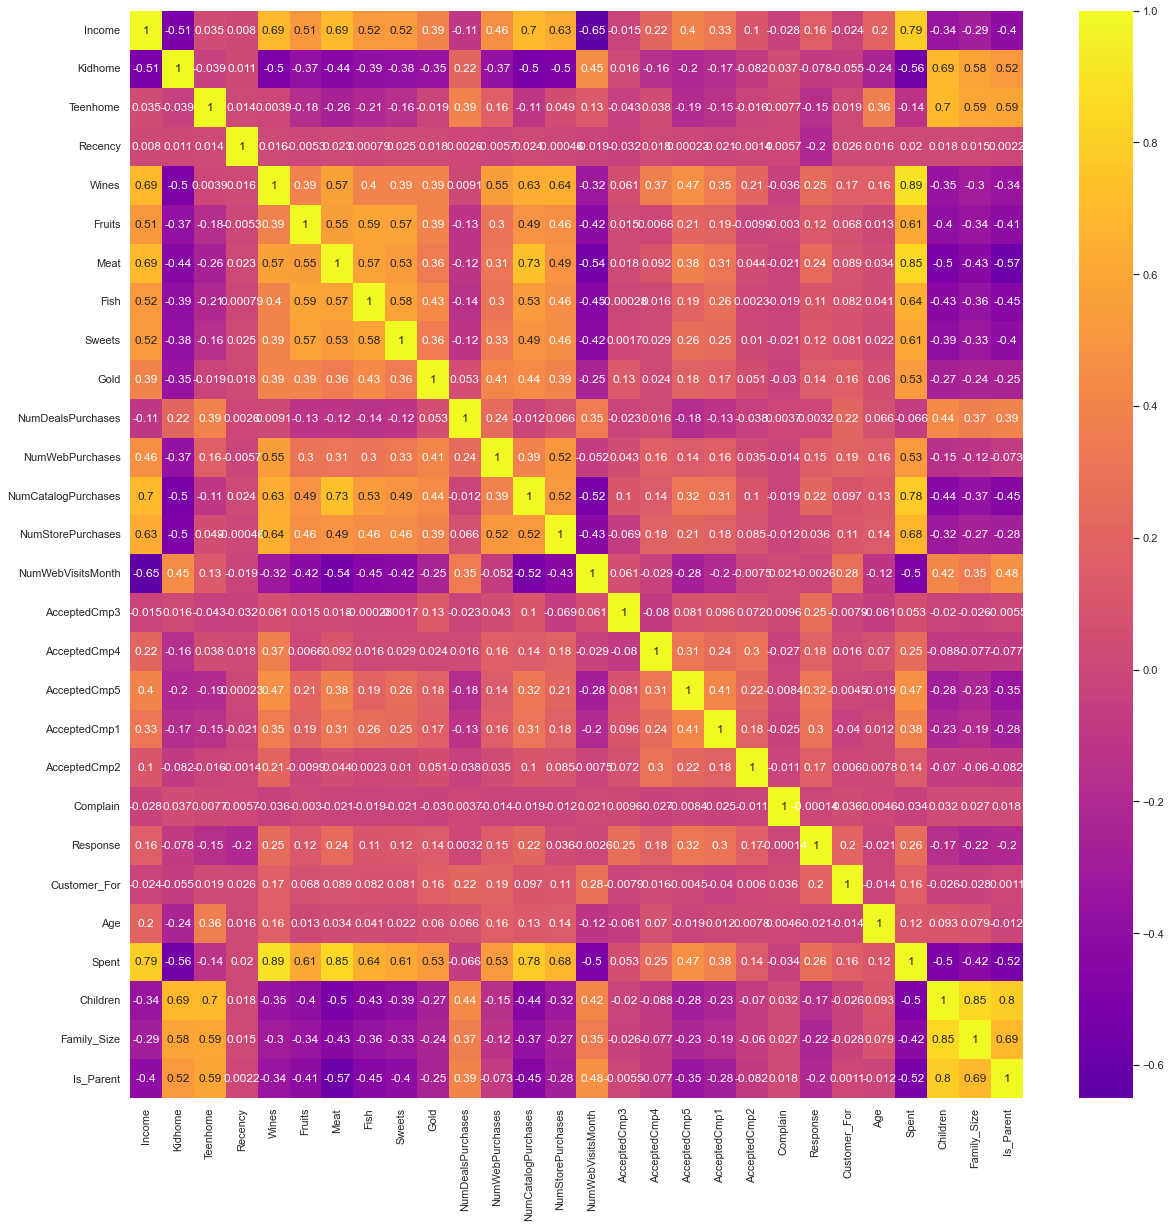

In [61]:
# Correlation matrix
corrmat = data.corr()

# Set custom color palette
colors = sns.color_palette("plasma", as_cmap=True)

# Plot the heatmap with custom color palette
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, center=0, cmap=colors)
plt.show()

## Insights

For preliminary analysis, we place more focus on spending amounts and patterns for different family compositions.

- `Income` shows a strong correlation of `Wines` and `Meat` purchases. (0.69)
- `Income` also shows strong correlation with `NumCatalogPurchases` (0.7)
- `NumWebVisitsMonth` shows negative correlation with all products listed in the dataset
- All products and the amounts spent on them show negative correlation of varying strength with the existence of `children` in the family. However, due to these predictors likely having multicollinearity relationships it is difficult to come up with definite conclusions about this correlation


## Strong correlation between multiple variables

From the correlation matrix, we can see that there is strong correlation between many variables across the board. This can lead to problems with multicollinearity and make it harder for analysis.

To address this, we will require Dimensionality Reduction and Principal Component Analysis to extract meaningful insights from the data.

- Strong correlations across many variables indicate that there is redundancy in information. PCA can be used to identify which directions carry more information than the others.
- Multicollinearity in predictors, such as `Family_Size` and `Children`, cause data trends to be difficult to be traced to a single predictor for analysis. Multicollinearity between predictors can also lead to inflated standard errors.

As such, in the next section of insights, we aim to use PCA and dimensionality reduction to obtain valuable insights to our data.
